In [83]:
# test_d = {'d1': [0, 1, 0, 1, 1, 0, 0],
#           'd2': [1, 0, 0, 0, 0, 1, 0],
#           'd3': [1, 0, 1, 1, 1, 1, 0],
#           'd4': [1, 1, 1, 1, 1, 0, 0],
#           'd5': [0, 1, 0, 1, 1, 1, 1],
#           'd6': [0, 0, 0, 1, 1, 1, 1],
#           'd7': [0, 0, 1, 1, 0, 1, 1],
#           'd8': [0, 0, 0, 1, 0, 1, 1],
#           'd9': [0, 0, 1, 0, 0, 1, 1],
#           'd10': [0, 0, 1, 1, 0, 0, 1],
#           'd11': [1, 0, 1, 1, 1, 0, 1],
#           'd12': [1, 0, 0, 1, 1, 0, 0],
#           'd13': [1, 0, 0, 0, 1, 1, 0],
#           'd14': [1, 0, 0, 1, 0, 1, 1],
#           'd15': [1, 0, 0, 1, 1, 0, 0],
#           'd16': [1, 0, 0, 1, 0, 0, 1],
#           'd17': [0, 1, 1, 1, 0, 1, 0],
#           'd18': [0, 1, 0, 0, 0, 1, 1],
#           'd19': [1, 1, 1, 1, 0, 1, 1],
#           'd20': [1, 1, 0, 0, 1, 0, 1]}

In [84]:
# # Load data
import numpy as np

data_d = {}
for i in range(1, 11):
    data_d["data{0}".format(i)] = np.load('results/Si-Ge_20/results'+str(i)+'.npz')

# data_d['data1'].files
test = data_d['data1']['checked_candidates']

test_d = {}
C = 1
for i in test:
    test_d['d'+str(C)] = list(i)
    C+=1

test_d

{'d1': [0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
 'd2': [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
 'd3': [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
 'd4': [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
 'd5': [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
 'd6': [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 'd7': [0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0],
 'd8': [0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'd9': [0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1],
 'd10': [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],
 'd11': [1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0],
 'd12': [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
 'd13': [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0],
 'd14': [1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0],
 'd15': [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1],
 'd16': [1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0],
 'd17': [0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 'd18': [0, 1, 0, 0, 0,

In [85]:
# Create a dictionary containing similarity score of a selected structure

compare_list = []
D = {}
D_count = 1
d_count = 0

for i in range(1, len(test_d)):
    temp = []
    sim_d = {}
    
    # select two adjacent structures at the top
    up = test_d['d'+str(i)]
    down = test_d['d'+str(i+1)]

    # create the list for comparison. After each iteration additional
    # structure will be added, 'down' coordinate will be compared with
    # all the scructures in this list.
    compare_list.append(up)

    #compute similarity score
    for k in compare_list:
        up = k
        sim_score = 0
        for j in range(len(test_d['d1'])):
            if down[j] == up[j]:
                sim_score += 1
            else:
                break
        # dictionary containing a structure 
        # and it's similarity score
        sim_d[str(k)+str(down)] = sim_score
        d_count += 1
    
    # dictionary containing all scores produced 
    # after each iteration
    D[str(D_count)] = sim_d
    D_count += 1


In [86]:
sim_L = []
for i in range(1, len(D)+1):
    sim_L.append(D[str(i)])

# sim_L

In [87]:
# function to return key for any value 
def get_key(sim_L):
    most_alike = []

    sim_D = D

    # Find the maximum similarity values for all structures
    maxes_ind = []
    for i in sim_D.values():
        maxes_ind.append(max(i.values()))

    for j in range(len(sim_L)):
        for key in sim_L[j]:
            if maxes_ind[j] == sim_L[j][key]:
                most_alike.append(key)
                break
        
    return most_alike    

In [88]:
# function to convert strings to lists
def ret_list(maxes_s):
    temp = []
    ML1 = []
    ML2 = []

    for i in range(len(maxes_s)):
        for l in maxes_s[i]:
            if len(temp) < (len(test_d['d1'])): 
                if l=='0' or l=='1':
                    temp.append(int(l))
        ML1.append(temp)
        temp = []
    
    for i in range(len(maxes_s)):
        for l in range(len(maxes_s[0])//2, len(maxes_s[0])):
            if len(temp) < (len(test_d['d1'])): 
                if maxes_s[i][l] =='0' or maxes_s[i][l] =='1':
                    temp.append(int(maxes_s[i][l]))
        ML2.append(temp)
        temp = []

    ML = []
    for j in range(len(maxes_s)):
        ML.append((ML1[j], ML2[j]))

    return ML

In [89]:
maxes_s = get_key(sim_L)
MAX = ret_list(maxes_s)

# MAX

In [90]:
# initialize the vertecies of first structure
init_v = list(range(1, len(MAX[0][0])+1))
ind_d = {'i1': init_v}
same_path = True 
count = len(MAX[0][0])

for i in range(0, len(MAX)):
    temp = []
    left = MAX[i][0]
    right = MAX[i][1]

    for j in range(len(left)):
        if right[j] == left[j] and same_path==True:
            for k in range(len(MAX)):
                if left == test_d['d1']:
                    IND = 0
                elif left == MAX[k][1]:
                    # print("True")
                    IND = MAX.index(MAX[k]) + 1
                    break
            # IND = MAX.index((left, HALF))
            temp.append(ind_d['i'+str(IND+1)][j])
        else:
            count += 1
            temp.append(count)
            same_path = False
        
    ind_d['i'+str(i+2)] = temp
    same_path=True

# ind_d

In [91]:
# Compute edges from vertecies and path infromation
def Edges(vertecies_val):
    root = 0
    count = 0
    EDGES = []
    first = []

    for k in vertecies_val.values():
        if k[0] not in first:
            first.append(k[0])

    for l in first:
        EDGES.append((root,l))



    for j in vertecies_val.values():
        for i in range(len(j)-1):
            if (j[i], j[i+1]) not in EDGES:
                EDGES.append((j[i], j[i+1]))
                    
    return EDGES

EDGES = Edges(ind_d)
# EDGES

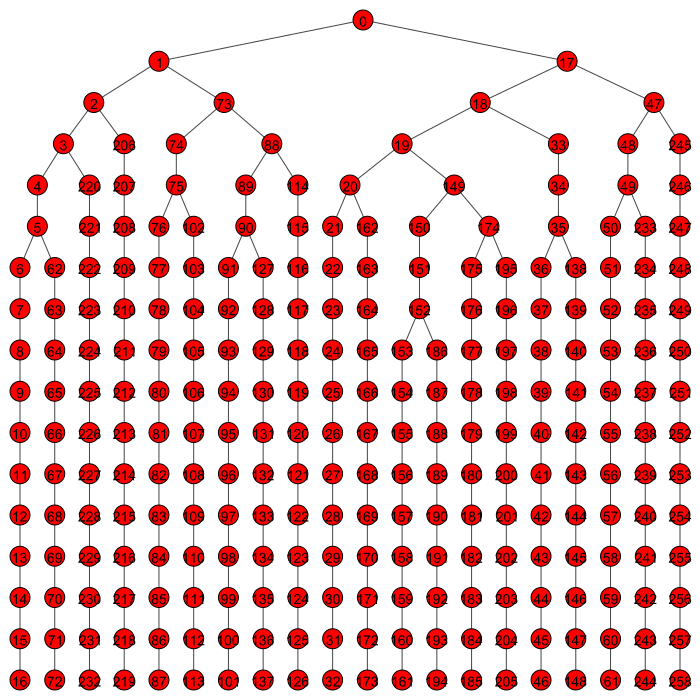

In [92]:
from igraph import *

# plot the tree graph
tree = Graph(edges=EDGES)
tree.vs['label'] = [v.index for v in tree.vs]
plot(tree,layout=tree.layout('rt',root=[0]),bbox=(700,700))